# Week 13 Homework

### 1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 


In [1]:
# bring in useful modules

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures


Read in both files and create separate dataframes

In [2]:
bottle_df = pd.read_csv('../bottle.csv', low_memory=False)
cast_df = pd.read_csv('../cast.csv', low_memory=False)

## bottle_df manipulation

I will work on bottle_df first and then cast_df. First look at a few rows of data to see what we are looking at.

In [3]:
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since I can see missing data from printing the head, I want to see how much data is missing next.

In [4]:
# get the number of missing values per column
missing_values_bottle_count = bottle_df.isnull().sum()

# check out the missing values in the first 20 columns
print(missing_values_bottle_count[0:20])

# check out the missing values in the last 20 columns
print(missing_values_bottle_count[54:])

# print shape of dataframe to see how many total rows there are
print(bottle_df.shape)

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
BtlNum         746196
RecInd              0
T_prec          10963
T_qual         841736
S_prec          47354
S_qual         789949
P_qual         191108
O_qual         680187
SThtaq         799040
dtype: int64
R_SVA                   52771
R_DYNHT                 46657
R_O2                   168662
R_O2Sat                198415
R_SIO3                 510764
R_PO4                  451538
R_NO3                  527452
R_NO2                  527279
R_NH4                  799881
R_CHLA                 639587
R_PHAEO                639588
R_PRES                      0
R_SAMP                 742857
DIC1                   862864
DIC2                   864639
TA1                    862779
TA2                    864629
pH2                    864853
pH1    

In [5]:
bottle_df.info

<bound method DataFrame.info of         Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0             1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1             1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2             1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3             1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4             1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   
...         ...      ...          ...                                     ...   
864858    34404   864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0000A-7   
864859    34404   864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0002A-3   
864860    34404   864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0005A-3   
864861    34404   864862  093.4 026.4  20-1611SR-MX-310-2239-09340264-0010A-3   
864862    34404   864863  093.4 026.4  20-1611SR-MX-310-2239-09340264-0015A-3

There are a few columns that need to be addressed. Sta_ID holds line and station number, Depth_ID holds multiple fields, T_degC is the temperature and will be needed in graphs later, IncTim is incubation time but is currently an object type, and Salnty is salinity and will be needed in graphs later.

In [6]:
bottle_df['T_degC'].isnull().sum()

10963

In [7]:
bottle_df['T_degC'].value_counts()

9.100     1115
9.020     1107
8.880     1102
9.300     1097
9.060     1087
          ... 
6.864        1
19.281       1
15.233       1
5.484        1
17.533       1
Name: T_degC, Length: 13847, dtype: int64

In [8]:
bottle_df.T_degC.corr(bottle_df.Salnty)

-0.5052659661915729

The nulls for T_degC and Salnty will be replaced using interpolate.

In [9]:
bottle_df['T_degC']=bottle_df['T_degC'].interpolate(method ='linear')
bottle_df['Salnty']=bottle_df['Salnty'].interpolate(method = 'linear')

In [10]:
bottle_df.T_degC.corr(bottle_df.Salnty)

-0.45113263421484395

In [11]:
print(bottle_df['T_degC'].isnull().sum())
print(bottle_df['Salnty'].isnull().sum())

0
0


Unfortunately, using interpolate caused the correlation between T_degC and Salnty to drop. Going to read the file back in and drop the nulls for those 2 columns instead.

In [12]:
bottle_df = pd.read_csv('../bottle.csv', low_memory=False)


In [13]:
bottle_df.dropna(subset=['T_degC', 'Salnty'], inplace=True)

In [14]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              814247 non-null  int64  
 1   Btl_Cnt              814247 non-null  int64  
 2   Sta_ID               814247 non-null  object 
 3   Depth_ID             814247 non-null  object 
 4   Depthm               814247 non-null  int64  
 5   T_degC               814247 non-null  float64
 6   Salnty               814247 non-null  float64
 7   O2ml_L               661489 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118613 non-null  float64
 12  RecInd               814247 non-null  int64  
 13  T_prec               814247 non-null  float64
 14  T_qual               12146 non-null   float64
 15  S_prec           

now at 814247 rows instead

In [15]:
#dropping the last 6 columns - they are mostly null and do not have anything to do with salinity or temperature
bottle_df.drop(['DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'], axis='columns', inplace=True)

In [16]:
bottle_df['IncTim'].value_counts()

12/30/1899 05:45:00    306
12/30/1899 05:50:00    253
12/30/1899 05:35:00    226
12/30/1899 05:40:00    202
12/30/1899 05:38:00    201
                      ... 
12/30/1899 04:45:00      7
12/30/1899 04:00:00      7
12/30/1899 03:30:00      6
12/30/1899 03:48:00      6
12/30/1899 08:33:00      6
Name: IncTim, Length: 194, dtype: int64

In [17]:
print(bottle_df['IncTim'].isnull().sum())

801441


In [18]:
bottle_df['Sta_ID'].value_counts()

090.0 045.0    9550
090.0 070.0    9531
090.0 037.0    9449
090.0 060.0    9083
080.0 060.0    8923
               ... 
094.0 040.0       1
102.0 035.0       1
094.0 035.0       1
102.0 030.0       1
068.0 050.0       1
Name: Sta_ID, Length: 2527, dtype: int64

In [19]:
bottle_df['Depth_ID'].value_counts()

20-16045S-MX-110-2018-06330900-0002A-3    2
20-16045S-MX-110-2018-06330900-0063A-3    2
20-16045S-MX-110-1421-06670900-0088A-3    2
20-16045S-MX-110-1421-06670900-0100A-3    2
20-16045S-MX-110-1421-06670900-0026A-3    2
                                         ..
19-6002BD-HY-051-0100-07330550-0400A-7    1
19-6002BD-HY-051-0100-07330550-0432A-3    1
19-6002BD-HY-051-0100-07330550-0500A-7    1
19-6002BD-HY-051-0100-07330550-0517A-3    1
20-1611SR-MX-310-2239-09340264-0015A-3    1
Name: Depth_ID, Length: 814234, dtype: int64

During research, determined row 840181 had malformed info in the Depth_ID column.

In [20]:
print(bottle_df.loc[840181:])

        Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
840181    33441   840182  083.3 110.0        20-1311-MX-322--08331100-0200A-7   
840182    33441   840183  083.3 110.0  20-1311NM-PR-322-1800-08331100-0201A-3   
840183    33441   840184  083.3 110.0  20-1311NM-PR-322-1800-08331100-0230A-3   
840184    33441   840185  083.3 110.0  20-1311NM-PR-322-1800-08331100-0250A-7   
840185    33441   840186  083.3 110.0  20-1311NM-PR-322-1800-08331100-0270A-3   
...         ...      ...          ...                                     ...   
864858    34404   864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0000A-7   
864859    34404   864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0002A-3   
864860    34404   864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0005A-3   
864861    34404   864862  093.4 026.4  20-1611SR-MX-310-2239-09340264-0010A-3   
864862    34404   864863  093.4 026.4  20-1611SR-MX-310-2239-09340264-0015A-3   

        Depthm  T_degC   Sa

updating the Depth_ID to look like it's "neighbors"

In [21]:
bottle_df['Depth_ID'][840181] = '20-1311NM-MX-322-1800-08331100-0200A-7'

C:\Users\13142\AppData\Local\Temp/ipykernel_11412/1296188656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottle_df['Depth_ID'][840181] = '20-1311NM-MX-322-1800-08331100-0200A-7'


In [22]:
bottle_df['Depth_ID'][840181]

'20-1311NM-MX-322-1800-08331100-0200A-7'

If I pull fields out of the Depth_ID column into other ones, I can drop columns (once done pulling this out, will drop this column)
- line and station are part of this field so Sta_ID can go away
- cast type will match up to Data_Type in cast.csv
- cast time
- century
- julian day


Format of Depth_ID:
[Century]-[YY][MM][ShipCode]-[CastType][Julian Day]-[CastTime]-[Line][Sta][Depth][Bottle]-[Rec_Ind]

Slicing data out to new columns

In [23]:
import re

bottle_df['century'] = bottle_df.Depth_ID.str.slice(0,2)
bottle_df['cast_type'] = bottle_df.Depth_ID.str.slice(10,12)
bottle_df['julian'] = bottle_df.Depth_ID.str.slice(13,16)
bottle_df['cast_time'] = bottle_df.Depth_ID.str.slice(17,21)
bottle_df['line'] = bottle_df.Depth_ID.str.slice(22,26)
bottle_df['station'] = bottle_df.Depth_ID.str.slice(26,30)


In [24]:
print(bottle_df.head())

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_CHLA  R_PHAEO  \
0       0   10.50  33.440     NaN  25.649    NaN  ...     NaN      NaN   
1       8   10.46  33.440     NaN  25.656    NaN  ...     NaN      NaN   
2      10   10.46  33.437     NaN  25.654    NaN  ...     NaN      NaN   
3      19   10.45  33.420     NaN  25.643    NaN  ...     NaN      NaN   
4      20   10.45  33.421     NaN  25.643    NaN  ...     NaN      NaN   

   R_PRES  R_SAMP  century  cast_type  julian  cast_time  line  station  
0       0     NaN       

Now that new columns have been added, time to drop Sta_ID and Depth_ID

In [25]:
bottle_df.drop(['Sta_ID', 'Depth_ID'], axis='columns', inplace=True)

In [26]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 71 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      814247 non-null  int64  
 1   Btl_Cnt      814247 non-null  int64  
 2   Depthm       814247 non-null  int64  
 3   T_degC       814247 non-null  float64
 4   Salnty       814247 non-null  float64
 5   O2ml_L       661489 non-null  float64
 6   STheta       812174 non-null  float64
 7   O2Sat        661274 non-null  float64
 8   Oxy_µmol/Kg  661268 non-null  float64
 9   BtlNum       118613 non-null  float64
 10  RecInd       814247 non-null  int64  
 11  T_prec       814247 non-null  float64
 12  T_qual       12146 non-null   float64
 13  S_prec       814247 non-null  float64
 14  S_qual       27523 non-null   float64
 15  P_qual       623580 non-null  float64
 16  O_qual       168602 non-null  float64
 17  SThtaq       15207 non-null   float64
 18  O2Satq       167181 non-

Appears that my new columns aren't the right type so that needs to be addressed

In [27]:
bottle_df['line'] = pd.to_numeric(bottle_df['line'])
bottle_df['station'] = pd.to_numeric(bottle_df['station'])
bottle_df['century'] = pd.to_datetime(bottle_df['century'], format='%y')
#bottle_df['julian'] = pd.to_datetime(bottle_df['julian'], format='%j')
bottle_df['cast_time'] = pd.to_numeric(bottle_df['cast_time'])

In [28]:
bottle_df['julian'] = pd.to_numeric(bottle_df['julian'])

Encode cast_type

In [29]:
bottle_df['cast_type'].value_counts()

HY    534090
MX    149157
CT     80924
PR     49708
10       368
Name: cast_type, dtype: int64

In [30]:
class_labels = LabelEncoder()
bottle_df['cast_type']=class_labels.fit_transform(bottle_df['cast_type'].values)
bottle_df['cast_type'].value_counts()

2    534090
3    149157
1     80924
4     49708
0       368
Name: cast_type, dtype: int64

IncTim should be a datetime field - date portion does not look right - get just the time portion into a new field, then drop the IncTim field

In [31]:
bottle_df['new_IncTim'] = bottle_df.IncTim.str.slice(11,19)

In [32]:
bottle_df['new_IncTim'] = pd.to_datetime(bottle_df['new_IncTim'], format='%H:%M:%S')

In [33]:
# drop original IncTim field
bottle_df.drop(['IncTim'], axis='columns', inplace=True)

Decided to remove quite a few more columms of the bottle_df dataset, based on names and them not having anything to do with temperature and salinity.

In [34]:
bottle_df.drop(['ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM','NO2q', 'NH3uM', 'NH3q'], axis='columns', inplace=True)

In [35]:
bottle_df.drop(['C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq','MeanAs', 'MeanAp', 'MeanAq'], axis='columns', inplace=True)

In [36]:
bottle_df.drop(['LightP'], axis='columns', inplace=True)

Removing reported amounts as well too

In [37]:
bottle_df.drop(['R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2','R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP'], axis='columns', inplace=True)

In [38]:
bottle_df.fillna(value=0, inplace=True)

In [39]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Cst_Cnt      814247 non-null  int64         
 1   Btl_Cnt      814247 non-null  int64         
 2   Depthm       814247 non-null  int64         
 3   T_degC       814247 non-null  float64       
 4   Salnty       814247 non-null  float64       
 5   O2ml_L       814247 non-null  float64       
 6   STheta       814247 non-null  float64       
 7   O2Sat        814247 non-null  float64       
 8   Oxy_µmol/Kg  814247 non-null  float64       
 9   BtlNum       814247 non-null  float64       
 10  RecInd       814247 non-null  int64         
 11  T_prec       814247 non-null  float64       
 12  T_qual       814247 non-null  float64       
 13  S_prec       814247 non-null  float64       
 14  S_qual       814247 non-null  float64       
 15  P_qual       814247 non-null  floa

No nulls are left, have 28 columns with 814247 rows

## cast_df manipulation

Now to take a look at the cast_df data

In [40]:
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


Since the station id and line id are part of multiple columns, I will separate them out like the work done in bottle_df then drop the duplicated columns:
- DbSta_ID
- Sta_ID
- Cruz_Sta (it is Sta_ID with YYYYMM on it)

Once I extract ship code out of Cruise_ID, I will drop it as well due to duplicated info.

In [41]:
cast_df['line'] = cast_df.Cast_ID.str.slice(22,26)
cast_df['station'] = cast_df.Cast_ID.str.slice(26,30)


In [42]:
print(cast_df[['Cruz_Sta', 'Cruise_ID', 'Date']].head())

         Cruz_Sta          Cruise_ID        Date
0  19490305400560  1949-03-01-C-31CR  03/01/1949
1  19490305200750  1949-03-01-C-31CR  03/01/1949
2  19490305100850  1949-03-01-C-31CR  03/02/1949
3  19490305000950  1949-03-01-C-31CR  03/02/1949
4  19490305001040  1949-03-01-C-31CR  03/02/1949


In [43]:
cast_df.drop(['Cruz_Sta','DbSta_ID', 'Sta_ID', 'Cast_ID'], axis='columns', inplace=True)

In [44]:
cast_df.drop(['Cruise_ID'], axis='columns', inplace=True)

In [45]:
cast_df.drop(['Year','Month','Julian_Day'], axis='columns', inplace=True)

In [46]:
cast_df.drop(['Julian_Date'], axis='columns', inplace=True)

In [47]:
cast_df.drop(['Lat_Hem','Lon_Hem'], axis='columns', inplace=True)

In [48]:
cast_df.drop(['Ship_Name', 'Orig_Sta_ID', 'PST_LAN'], axis='columns', inplace=True)

In [49]:
cast_df['Sta_Code'].value_counts()

ST     15117
NST     7159
IMX     5834
NRO     3822
OCO     1782
MBR      457
SCO      233
Name: Sta_Code, dtype: int64

In [50]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cst_Cnt     34404 non-null  int64  
 1   Cruise      34404 non-null  int64  
 2   Quarter     34404 non-null  int64  
 3   Sta_Code    34404 non-null  object 
 4   Distance    19714 non-null  float64
 5   Date        34404 non-null  object 
 6   Time        34080 non-null  object 
 7   Lat_Dec     34404 non-null  float64
 8   Lat_Deg     34404 non-null  int64  
 9   Lat_Min     34404 non-null  float64
 10  Lon_Dec     34404 non-null  float64
 11  Lon_Deg     34404 non-null  int64  
 12  Lon_Min     34404 non-null  float64
 13  Rpt_Line    34404 non-null  float64
 14  St_Line     34404 non-null  float64
 15  Ac_Line     34404 non-null  float64
 16  Rpt_Sta     34404 non-null  float64
 17  St_Station  34404 non-null  float64
 18  Ac_Sta      34404 non-null  float64
 19  Bottom_D    32123 non-nul

In [51]:
cast_df['Time'] = pd.to_datetime(cast_df['Time'], format='%H:%M:%S')
cast_df['Date'] = pd.to_datetime(cast_df['Date'], format="%m/%d/%Y")

The type on the new columns needs to be fixed.

In [52]:
cast_df['line'] = pd.to_numeric(cast_df['line'])
cast_df['station'] = pd.to_numeric(cast_df['station'])

Creating new IncStr and IncEnd columns since these are supposed to be time fields.

In [53]:
cast_df['new_IncStr'] = cast_df.Inc_Str.str.slice(11,19)
cast_df['new_IncEnd'] = cast_df.Inc_End.str.slice(11,19)

In [54]:
cast_df['new_IncStr'] = pd.to_datetime(cast_df['new_IncStr'], format='%H:%M:%S')
cast_df['new_IncEnd'] = pd.to_datetime(cast_df['new_IncEnd'], format='%H:%M:%S')

In [55]:
cast_df.drop(['Inc_Str', 'Inc_End', 'Civil_T'], axis='columns', inplace=True)

In [56]:
cast_df.drop(['TimeZone'], axis='columns', inplace=True)

In [57]:
cast_df[['Sta_Code','Ship_Code','Data_Type', 'Data_Or', 'Cruz_Num']].head()

,Sta_Code,Ship_Code,Data_Type,Data_Or,Cruz_Num
0,NST,31CR,HY,NaN,4903
1,NST,31CR,HY,NaN,4903
2,NST,31CR,HY,NaN,4903
3,NST,31CR,HY,NaN,4903
4,NST,31CR,HY,NaN,4903


Time to update remaining categorical fields.

In [58]:
cast_df[['Sta_Code','Ship_Code','Data_Type', 'Data_Or', 'Cruz_Num']].value_counts()

Sta_Code  Ship_Code  Data_Type  Data_Or  Cruz_Num
NST       32NM       CT         3101     FRONTS88    213
                     HY         3101     FRONTS88    200
          31JD       10         3101     8402        149
          32NM       CT         3101     SQ87        120
          31AX       HY         3101     7303         99
                                                    ... 
MBR       31AX       HY         3101     6912          1
NST       31JD       HY         3101     6902          1
MBR       31AX       HY         3101     6908          1
NRO       31JD       CT         3101     6901          1
NST       31EB       HY         3101     8307          1
Length: 1005, dtype: int64

In [59]:
class_labels = LabelEncoder()
cast_df['Sta_Code'] = class_labels.fit_transform(cast_df['Sta_Code'].values)
class_lab = LabelEncoder()
cast_df['Ship_Code'] = class_lab.fit_transform(cast_df['Ship_Code'].values)
class_lab1 = LabelEncoder()
cast_df['Data_Type'] = class_lab1.fit_transform(cast_df['Data_Type'].values)
class_lab2 = LabelEncoder()
cast_df['Data_Or'] = class_lab2.fit_transform(cast_df['Data_Or'].values)
class_lab3 = LabelEncoder()
cast_df['Cruz_Num'] = class_lab3.fit_transform(cast_df['Cruz_Num'].values)


In [60]:
cast_df[['Sta_Code','Ship_Code','Data_Type', 'Data_Or', 'Cruz_Num']].head()

,Sta_Code,Ship_Code,Data_Type,Data_Or,Cruz_Num
0,3,5,2,4,69
1,3,5,2,4,69
2,3,5,2,4,69
3,3,5,2,4,69
4,3,5,2,4,69


In [61]:
cast_df[['Sta_Code','Ship_Code','Data_Type', 'Data_Or', 'Cruz_Num']].value_counts()

Sta_Code  Ship_Code  Data_Type  Data_Or  Cruz_Num
3         22         1          0        375         213
                     2          0        375         200
          11         0          0        299         149
          22         1          0        377         120
          3          2          0        252          99
                                                    ... 
2         18         2          4        157           1
                                         160           1
3         11         4          0        16            1
1         16         2          4        97            1
3         16         2          4        135           1
Length: 2306, dtype: int64

In [62]:
cast_df.drop(['Wave_Dir', 'Wind_Spd', 'Barometer', 'Dry_T', 'Wet_T', 'Wea', 'Cloud_Typ', 'Cloud_Amt', 'Visibility'], axis='columns', inplace=True)

In [63]:
cast_df.drop(['Cruz_Leg', 'IntChl', 'IntC14', 'Wave_Ht', 'Wave_Prd'], axis='columns', inplace=True)

In [64]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Cst_Cnt     34404 non-null  int64         
 1   Cruise      34404 non-null  int64         
 2   Quarter     34404 non-null  int64         
 3   Sta_Code    34404 non-null  int32         
 4   Distance    19714 non-null  float64       
 5   Date        34404 non-null  datetime64[ns]
 6   Time        34080 non-null  datetime64[ns]
 7   Lat_Dec     34404 non-null  float64       
 8   Lat_Deg     34404 non-null  int64         
 9   Lat_Min     34404 non-null  float64       
 10  Lon_Dec     34404 non-null  float64       
 11  Lon_Deg     34404 non-null  int64         
 12  Lon_Min     34404 non-null  float64       
 13  Rpt_Line    34404 non-null  float64       
 14  St_Line     34404 non-null  float64       
 15  Ac_Line     34404 non-null  float64       
 16  Rpt_Sta     34404 non-

In [65]:
cast_df[['Distance', 'Bottom_D', 'Secchi', 'ForelU', 'Order_Occ', 'Event_Num', 'Wind_Dir']]=cast_df[['Distance', 'Bottom_D', 'Secchi', 'ForelU', 'Order_Occ', 'Event_Num', 'Wind_Dir']].fillna(value=0)


In [66]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Cst_Cnt     34404 non-null  int64         
 1   Cruise      34404 non-null  int64         
 2   Quarter     34404 non-null  int64         
 3   Sta_Code    34404 non-null  int32         
 4   Distance    34404 non-null  float64       
 5   Date        34404 non-null  datetime64[ns]
 6   Time        34080 non-null  datetime64[ns]
 7   Lat_Dec     34404 non-null  float64       
 8   Lat_Deg     34404 non-null  int64         
 9   Lat_Min     34404 non-null  float64       
 10  Lon_Dec     34404 non-null  float64       
 11  Lon_Deg     34404 non-null  int64         
 12  Lon_Min     34404 non-null  float64       
 13  Rpt_Line    34404 non-null  float64       
 14  St_Line     34404 non-null  float64       
 15  Ac_Line     34404 non-null  float64       
 16  Rpt_Sta     34404 non-

Kept 34404 rows and 33 columns

### 2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature. 


Water temperature is not one of the columns in the cast_df dataset. I will do a correlation matrix on each.

For the bottle_df correlation matrix, the strongest correlation for temperature is depth - it is a negative correlation so the deeper the water, the colder it gets. Other top variables with correlation to temperature include salinity (also negative), oxygen, which can be seen in multiple columns (milliliters of dissolved oxygen per Liter seawater, oxygen saturation, and oxygen in micro moles per kilogram of seawater), and density (STheta).

Overall, the deeper the water, the colder it is, the more salinity it has, and the denser it becomes. The warmer the water, the more oxygen it contains.

In [67]:
#correlation matrix for bottle_df

corr = bottle_df.corr()
sns.set(rc = {'figure.figsize':(15,10)})

corr.style.background_gradient(cmap='coolwarm')


,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,NO3uM,NO3q,cast_type,julian,cast_time,line,station
Cst_Cnt,1.000000,0.999302,-0.148351,0.070924,-0.201875,0.187355,-0.106676,0.177194,0.186596,0.457434,-0.098132,0.074410,0.153008,0.454089,0.236135,-0.661416,-0.082145,0.145227,-0.098573,0.535838,-0.789537,0.536144,-0.015062,0.020422,-0.170012,-0.018975
Btl_Cnt,0.999302,1.000000,-0.147733,0.071766,-0.199039,0.186605,-0.106637,0.176545,0.185847,0.462532,-0.098697,0.068887,0.156526,0.452658,0.242236,-0.660519,-0.082217,0.149007,-0.098990,0.529684,-0.779297,0.539540,-0.016998,0.019151,-0.165667,-0.018824
Depthm,-0.148351,-0.147733,1.000000,-0.676504,0.572867,-0.444190,0.412377,-0.458278,-0.443988,-0.154159,0.078024,0.025977,-0.008007,0.003203,0.006442,0.120041,0.017092,-0.001517,0.019570,0.147069,0.128041,-0.097478,0.008590,-0.013893,-0.018837,0.159321
T_degC,0.070924,0.071766,-0.676504,1.000000,-0.505266,0.599589,-0.595425,0.653216,0.599478,0.168906,-0.062625,-0.047593,-0.024557,-0.036218,-0.037942,-0.072447,-0.035626,0.010068,-0.033445,-0.357386,-0.049632,0.065298,0.059082,0.013861,0.242558,-0.036742
Salnty,-0.201875,-0.199039,0.572867,-0.505266,1.000000,-0.625356,0.436935,-0.612063,-0.624912,-0.248483,0.065717,-0.019075,-0.007647,-0.083097,-0.007941,0.204000,0.037213,-0.024072,0.039197,0.221773,0.206805,-0.171327,0.002183,-0.018007,0.351402,-0.060122
O2ml_L,0.187355,0.186605,-0.444190,0.599589,-0.625356,1.000000,-0.355259,0.994130,0.999222,0.251775,-0.073520,-0.112827,0.008877,0.243990,0.012305,-0.237398,-0.571387,-0.017344,-0.571562,-0.168560,-0.331475,0.347112,-0.018059,0.013866,-0.099539,0.100314
STheta,-0.106676,-0.106637,0.412377,-0.595425,0.436935,-0.355259,1.000000,-0.372490,-0.346353,-0.249749,0.014055,0.021596,0.015232,-0.018904,0.023538,0.130726,-0.037654,-0.349332,-0.047252,0.226657,0.035092,-0.116493,-0.041638,-0.020555,-0.032856,-0.002860
O2Sat,0.177194,0.176545,-0.458278,0.653216,-0.612063,0.994130,-0.372490,1.000000,0.994954,0.246897,-0.072631,-0.109420,0.005065,0.226494,0.007383,-0.226048,-0.545351,-0.023886,-0.546694,-0.196993,-0.312307,0.330245,-0.007706,0.013958,-0.064948,0.095197
Oxy_µmol/Kg,0.186596,0.185847,-0.443988,0.599478,-0.624912,0.999222,-0.346353,0.994954,1.000000,0.249582,-0.073967,-0.112748,0.008914,0.243449,0.012339,-0.236275,-0.570779,-0.023383,-0.572513,-0.168649,-0.330819,0.346025,-0.018234,0.013752,-0.099185,0.100395
BtlNum,0.457434,0.462532,-0.154159,0.168906,-0.248483,0.251775,-0.249749,0.246897,0.249582,1.000000,-0.290382,-0.039578,-0.042630,0.217175,-0.034246,-0.629553,-0.132062,0.073804,-0.128936,0.071365,-0.349951,0.517991,-0.007404,0.022654,-0.095819,0.020576


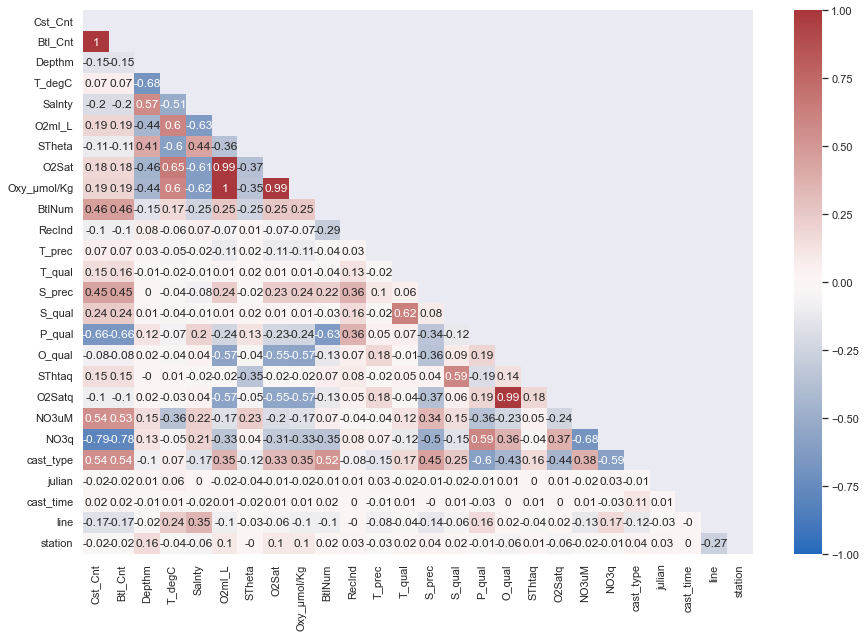

In [68]:

matrix = bottle_df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

Most of the correlations I see are related to longitude and latitude. The Cruise and cast count are heavily correlated as well.

In [69]:
corr = cast_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Cst_Cnt,Cruise,Quarter,Sta_Code,Distance,Lat_Dec,Lat_Deg,Lat_Min,Lon_Dec,Lon_Deg,Lon_Min,Rpt_Line,St_Line,Ac_Line,Rpt_Sta,St_Station,Ac_Sta,Bottom_D,Secchi,ForelU,Ship_Code,Data_Type,Order_Occ,Event_Num,Data_Or,Cruz_Num,Wind_Dir,line,station
Cst_Cnt,1.000000,0.979474,0.013479,0.495890,-0.246605,0.204497,0.202899,0.014296,-0.123390,-0.121520,0.019702,-0.196671,-0.154317,-0.196886,0.001131,0.001147,0.009648,-0.001272,0.361570,0.139606,0.556380,0.442693,0.372621,0.010098,-0.851203,0.239257,-0.073136,-0.349646,0.215114
Cruise,0.979474,1.000000,0.005393,0.526675,-0.258042,0.226418,0.224463,0.018199,-0.146512,-0.144378,0.022186,-0.221292,-0.174327,-0.221444,0.012956,0.012969,0.022247,-0.001093,0.363738,0.114235,0.584789,0.534821,0.392078,-0.114220,-0.818570,0.089947,-0.063976,-0.414169,0.268845
Quarter,0.013479,0.005393,1.000000,0.021377,-0.021664,0.027663,0.027711,-0.001445,-0.043157,-0.043573,-0.007976,-0.035179,-0.029489,-0.035312,0.030057,0.030034,0.032554,0.004527,0.036086,0.026698,0.122648,0.050025,0.071524,0.066653,0.005634,-0.014490,0.047638,-0.047881,0.035169
Sta_Code,0.495890,0.526675,0.021377,1.000000,-0.415983,0.431733,0.428428,0.029291,-0.343631,-0.337750,0.064210,-0.444498,-0.345402,-0.443722,0.113631,0.113646,0.116552,-0.036092,0.215609,0.097257,0.325601,0.400933,0.200544,-0.249523,-0.379385,0.012479,-0.075971,-0.454247,0.173247
Distance,-0.246605,-0.258042,-0.021664,-0.415983,1.000000,-0.074355,-0.074007,-0.002223,0.503127,0.499756,-0.021240,0.249063,0.197213,0.248744,-0.612929,-0.612940,-0.615438,-0.429002,-0.230004,-0.007834,-0.141243,-0.234383,-0.086137,0.142969,0.171360,-0.017074,0.015822,0.234415,-0.267240
Lat_Dec,0.204497,0.226418,0.027663,0.431733,-0.074355,1.000000,0.996921,0.009499,-0.650523,-0.646296,0.025620,-0.958314,-0.753305,-0.958080,0.008196,0.008178,0.034686,-0.110636,0.013217,0.036999,0.089805,0.101198,0.136061,-0.027674,-0.202675,0.037762,-0.069819,-0.764014,0.064302
Lat_Deg,0.202899,0.224463,0.027711,0.428428,-0.074007,0.996921,1.000000,-0.068935,-0.651926,-0.647386,0.029913,-0.956562,-0.751567,-0.956351,0.012448,0.012430,0.038893,-0.109481,0.013439,0.036346,0.088783,0.099248,0.136256,-0.025149,-0.202262,0.038659,-0.070412,-0.762088,0.064455
Lat_Min,0.014296,0.018199,-0.001445,0.029291,-0.002223,0.009499,-0.068935,1.000000,0.037262,0.033129,-0.055512,0.006172,0.000252,0.006468,-0.054477,-0.054479,-0.054693,-0.011426,-0.003221,0.007227,0.010353,0.021859,-0.006534,-0.031377,0.000760,-0.012552,0.009636,-0.001819,-0.003862
Lon_Dec,-0.123390,-0.146512,-0.043157,-0.343631,0.503127,-0.650523,-0.651926,0.037262,1.000000,0.997405,0.014812,0.836085,0.664779,0.839170,-0.749363,-0.749349,-0.779511,-0.371136,-0.101575,0.001522,-0.048142,-0.097817,-0.103584,0.047346,0.127529,-0.007168,0.058474,0.654913,-0.322070
Lon_Deg,-0.121520,-0.144378,-0.043573,-0.337750,0.499756,-0.646296,-0.647386,0.033129,0.997405,1.000000,0.086756,0.832120,0.661669,0.835171,-0.749580,-0.749563,-0.779432,-0.372930,-0.099581,0.002297,-0.046365,-0.094885,-0.102945,0.045083,0.126785,-0.007156,0.058365,0.651547,-0.323158


### 3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 


The accuracy score seems low for predicting water temperature based on salinity.

In [70]:
# Setup the data

X = np.array(bottle_df['Salnty']).reshape(-1,1)
y = np.array(bottle_df['T_degC']).reshape(-1,1)

#1. train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#2. create the model
regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

#3. predict new values
y_pred = regression_df.predict(X_test)
y_pred

array([[12.94837851],
       [16.28180909],
       [10.03162676],
       ...,
       [13.51783957],
       [11.79093734],
       [ 9.65198605]])

In [71]:
accuracy_score = regression_df.score(X_test, y_test)
print(accuracy_score)

0.25406351901305435


In [72]:
#cross validation - it's a large dataset so went with 20
cv_results = cross_val_score(regression_df,X,y,cv=20)
print(cv_results)
np.mean(cv_results)

[ 0.220495    0.30014923  0.41485757  0.32288423 -0.60865221 -0.13115708
  0.10316832  0.28344098  0.25291382  0.26070191 -0.32948303  0.44173888
  0.47894494  0.4156516   0.50641834  0.51929685  0.47297512  0.56889555
  0.54821123  0.51114523]


0.27762982304749684

### 4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 


The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. The smaller the mse, the closer the fit is to the data.

R2 is the accuracy score for predicting the temperature. It shows how well the data fit the regression model (the goodness of fit). A higher R2 indicates a better fit for the model.

The Root Mean Squared Error (RMSE) is the square root of the mean square error. It has the same units as the quantity plotted on the vertical axis.

In [73]:
# find r2
perc = r2_score(y_test,y_pred)
print("R2 Linear Regression Score :{:.1%}".format(perc))

#fine rmse
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :{:.1%}".format(rmse))


R2 Linear Regression Score :25.4%
Root Mean Squared Error :364.8%


In [74]:
#find mse
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error :{:.1%}".format(mse))

Mean Squared Error :1330.9%


### 5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 


Compare the salinity and temperature correlation

In [75]:
bottle_df.T_degC.corr(bottle_df.Salnty)

-0.5052659661915729

Create dataframe with just Salnty and T_degC

In [76]:
temp_sal_df = bottle_df[['Salnty', 'T_degC']]
temp_sal_df.head()

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [77]:
temp_sal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Salnty  814247 non-null  float64
 1   T_degC  814247 non-null  float64
dtypes: float64(2)
memory usage: 50.9 MB


In [78]:
# Setup the data

X = np.array(temp_sal_df['Salnty']).reshape(-1,1)
y = np.array(temp_sal_df['T_degC']).reshape(-1,1)

#1. train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#2. create the model
regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

#3. predict new values
y_pred = regression_df.predict(X_test)
y_pred

array([[12.95043046],
       [16.28635309],
       [10.03149816],
       ...,
       [12.9921295 ],
       [10.40215623],
       [10.49482075]])

In [79]:
perc = r2_score(y_test,y_pred)
print("R2 Linear Regression Score :{:.1%}".format(perc))

R2 Linear Regression Score :25.2%


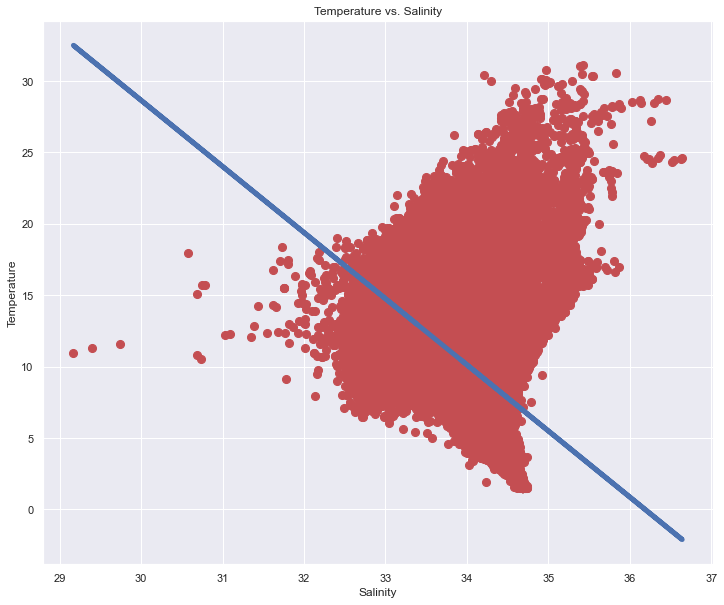

In [80]:
plt.figure(figsize=(12,10))
plt.scatter(X_test,y_test,s=65,c="r")
plt.plot(X_test,y_pred,c="b",linewidth='5')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.title('Temperature vs. Salinity')
plt.show()
sns.set(font_scale=1)

### 6.	Do some research on polynomial regression. Describe what it is and how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ 


Polynomial features are those features created by raising existing features to an exponent. The creation of new input features is based on the existing features. When used as input to a linear regression algorithm, the method is more broadly referred to as polynomial regression. It extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables, X, X2, and X3, as predictors. This approach provides a simple way to provide a non-linear fit to data.


### 7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 


In [92]:
# Setup the data

X_new = np.array(temp_sal_df['Salnty']).reshape(-1,1)
y_new = np.array(temp_sal_df['T_degC']).reshape(-1,1)

poly_regr = PolynomialFeatures(degree = 6) # our polynomial model is of order
X_poly = poly_regr.fit_transform(X_new) # transforms the features to the polynomial form
lin_reg_2 = LinearRegression() # creates a linear regression object
lin_reg_2.fit(X_poly, y) # fits the linear regression object to the polynomial features

#create training and test datasets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_poly, y_new, test_size=0.3, random_state=42)


lin_reg = LinearRegression() # create model object
lin_reg.fit(X_train_new, y_train_new) # fits the model to the training data



# predict 
y_pred_new = lin_reg.predict(X_test_new)


In [93]:
# calculate revised mse
mse2= mean_squared_error(y_test_new, y_pred_new)
print("Revised Mean Squared Error :{:.1%}".format(mse2))

# calculate revised r2
perc2 = r2_score(y_test_new,y_pred_new)
print("R2 Linear Regression Score :{:.1%}".format(perc2))

Revised Mean Squared Error :1097.1%
R2 Linear Regression Score :38.5%


### 8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

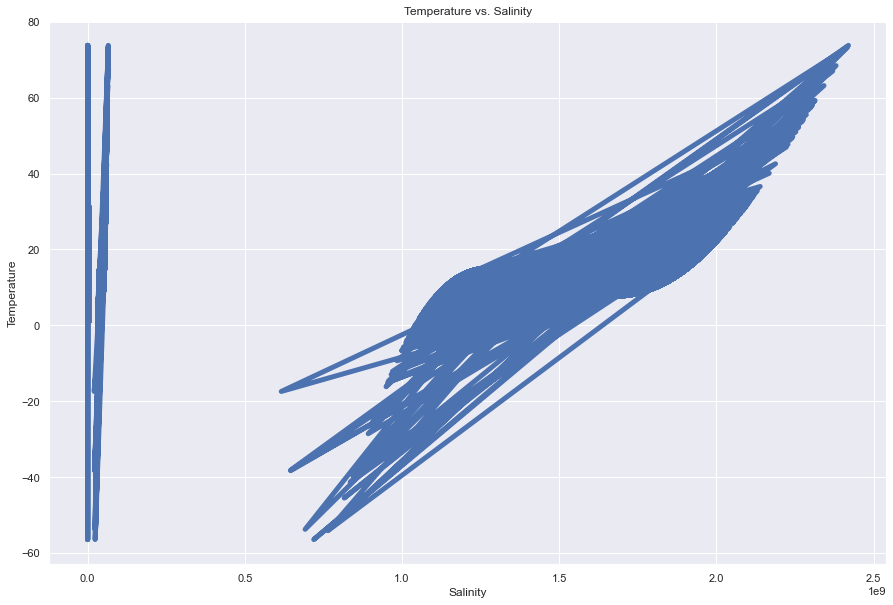

In [86]:
plt.scatter(X_new,y_new, c='r') 
 
#plt.plot(X_test_new,regressor2.predict(poly_reg.fit_transform(X_test_new)),c="b",linewidth='5')
#plt.plot(X_test_new, regressor.predict(poly_reg.fit_transform(X_test_new)), color = 'blue') # plotting the polynomial regression line
#plt.plot(X_test_new,lin_reg.predict(poly_regr.fit_transform(X_test_new)),c='b',linewidth='5')
plt.plot(X_test_new,y_pred_new,c="b",linewidth='5')

#plot used for the linear regression in #5 above
#plt.plot(X_test,y_pred,c="b",linewidth='5')

plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.title('Temperature vs. Salinity')
plt.show()

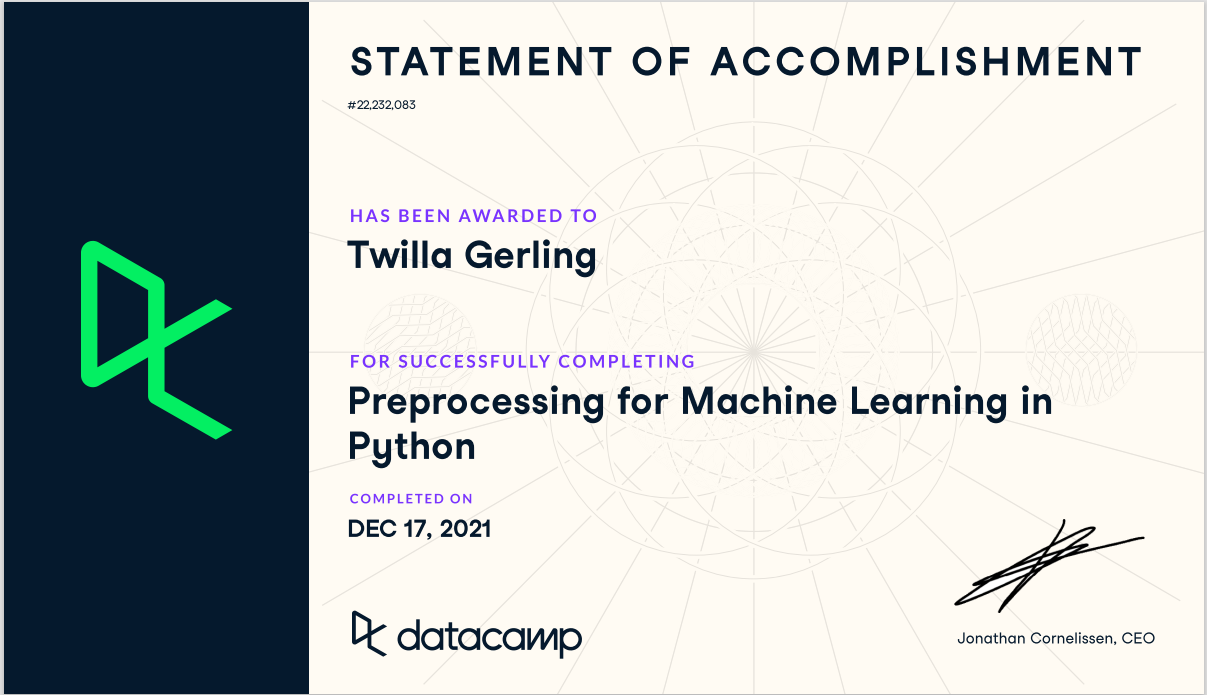

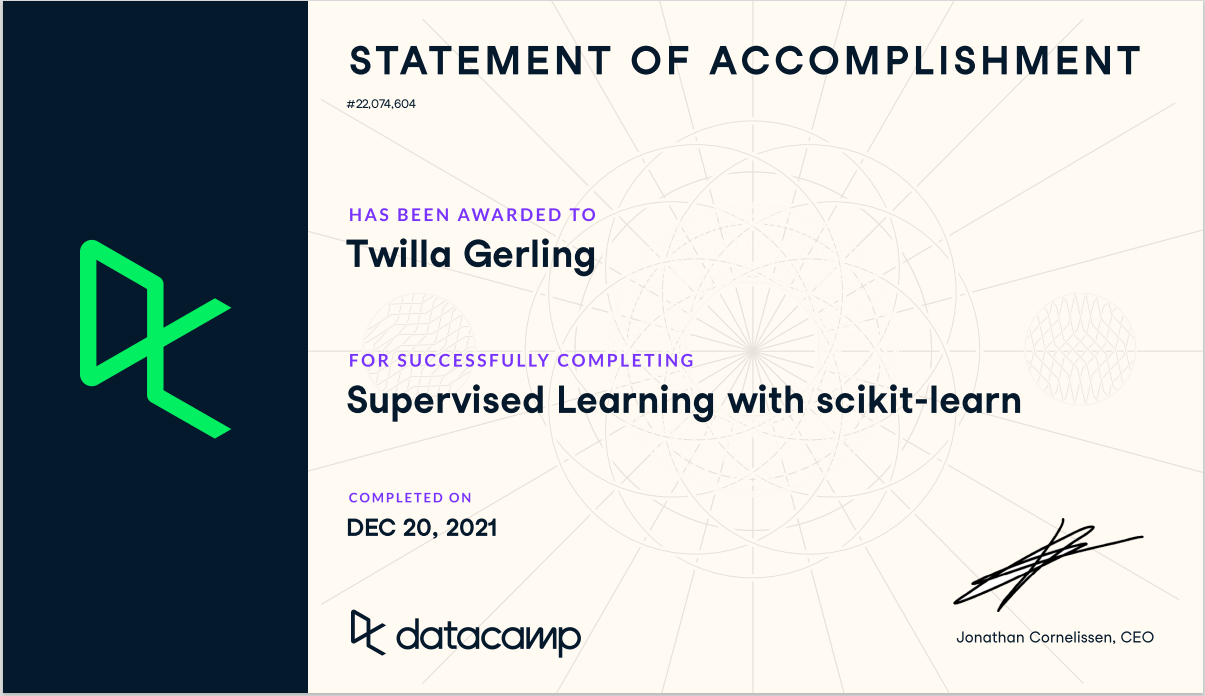